#<font color='cyan'>Description of Dataset</font>
> <font color='violet'> The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.
The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.
The test data set, (test.csv), is the same as the training set, except that it does not contain the "label" column.</font>

> <font color='violet'>The size of train.csv is 75Mb,and shape of 42,000 X 785, while test.csv is 50Mb and shape of 28,000 X 784 </font>

><font color='violet'>EMPHASIS: The target is the column called "label" which is found in train.csv. It is not present in test.csv as it is to be predicted on test dataset.</font>

<font color='violet'>No missing data or duplicates</font>



#<font color='cyan'>Digit Recognizer Exercise</font>


##<font color='cyan'>Loading the Datasets</font>

In [ ]:
import tensorflow as tf
import pandas as pd

dig_train = pd.read_csv('/content/drive/MyDrive/digit_recognizer/train.csv')
dig_test = pd.read_csv('/content/drive/MyDrive/digit_recognizer/test.csv')


In [ ]:
dig_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Preparing my features and labels for training and validation
X = dig_train.drop(columns=['label']).values  # Features (pixel values)
y = dig_train['label'].values  # Labels (digits)


In [ ]:
# Training and validation split
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=42)


##<font color='cyan'>Baseline like a dummy</font>
my base line will always return the most frequent class in the training data.
I want to use its accuracy as a measure against other models I will be uisng


In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

# Using the most frequent class in the y_train set
most_frequent_class = np.bincount(y_train).argmax()

# predictions based on the most frequent class
baseline_predictions = np.full_like(y_val, fill_value=most_frequent_class)

# Calculate accuracy of the baseline predictions
baseline_accuracy = accuracy_score(y_val, baseline_predictions)
print(f"Baseline Accuracy: {baseline_accuracy * 100:.2f}%")


Baseline Accuracy: 11.02%


<font color='cyan'>visuals of the result</font>


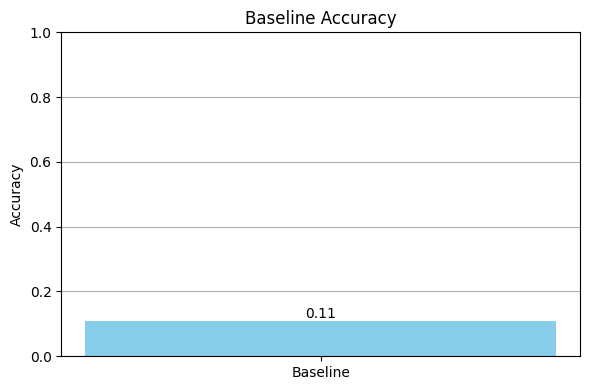

In [ ]:
import matplotlib.pyplot as plt

# Plotting the baseline accuracy
plt.figure(figsize=(6, 4))
plt.bar(["Baseline"], [baseline_accuracy], color='skyblue')
plt.ylabel('Accuracy')
plt.title('Baseline Accuracy')
plt.ylim(0, 1)  # Limiting y-axis from 0 to 1 for accuracy range
plt.grid(axis='y')

# Displaying the value on top of each bar
for index, value in enumerate([baseline_accuracy]):
    plt.text(index, value, f"{value:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

<font color='cyan'>we observe the result of the baseline as an accuracy 11%.
This is because it is a dummy I established to make flat predictions of the most common classidication</font>

In [ ]:
#Reshaping the train and validtion for linear model
X_train_reshaped = X_train.reshape(-1, 28, 28, 1)
X_val_reshaped = X_val.reshape(-1, 28, 28, 1)

##<font color='cyan'>Linear Model (Single Perceptron)</font>


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers


linear_model = keras.Sequential([
  layers.InputLayer(input_shape=(28, 28, 1)), #input image shape 28 x 28 = 784
  layers.Flatten(), #I am squashing 2d input into 1d of 784 element
  layers.Dense(10, activation='softmax') # I am using 10 output neurons because range is 0 - 9
])


##<font color='cyan'>Fitting and saving the Linear Model in one working pipeline</font>


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

#configuring training process for NN
linear_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = linear_model.fit(X_train_reshaped, y_train, epochs=10, validation_data=(X_val_reshaped, y_val))

# Saving the model
linear_model.save('linear_model.h5')


Epoch 1/10
788/788 [==============================] - 3s 3ms/step - loss: 12.3458 - accuracy: 0.8100 - val_loss: 8.0749 - val_accuracy: 0.8508
Epoch 2/10
788/788 [==============================] - 2s 2ms/step - loss: 6.4527 - accuracy: 0.8763 - val_loss: 6.8230 - val_accuracy: 0.8574
Epoch 3/10
788/788 [==============================] - 2s 2ms/step - loss: 6.0909 - accuracy: 0.8790 - val_loss: 6.2262 - val_accuracy: 0.8839
Epoch 4/10
788/788 [==============================] - 3s 3ms/step - loss: 5.3558 - accuracy: 0.8864 - val_loss: 6.5292 - val_accuracy: 0.8770
Epoch 5/10
788/788 [==============================] - 3s 3ms/step - loss: 5.1424 - accuracy: 0.8903 - val_loss: 6.8165 - val_accuracy: 0.8790
Epoch 6/10
788/788 [==============================] - 3s 4ms/step - loss: 5.0773 - accuracy: 0.8926 - val_loss: 6.8467 - val_accuracy: 0.8701
Epoch 7/10
788/788 [==============================] - 2s 3ms/step - loss: 4.9203 - accuracy: 0.8937 - val_loss: 6.2308 - val_accuracy: 0.8862
Epoch

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Loading the model (to validate the saved model)
loaded_model = load_model('linear_model.h5')


# Evaluate on reshaped validation data
val_loss, val_accuracy = loaded_model.evaluate(X_val_reshaped, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


525/525 [==============================] - 2s 3ms/step - loss: 8.3904 - accuracy: 0.8574
Validation Accuracy: 85.74%


<font color='cyan'>visuals of the result</font>


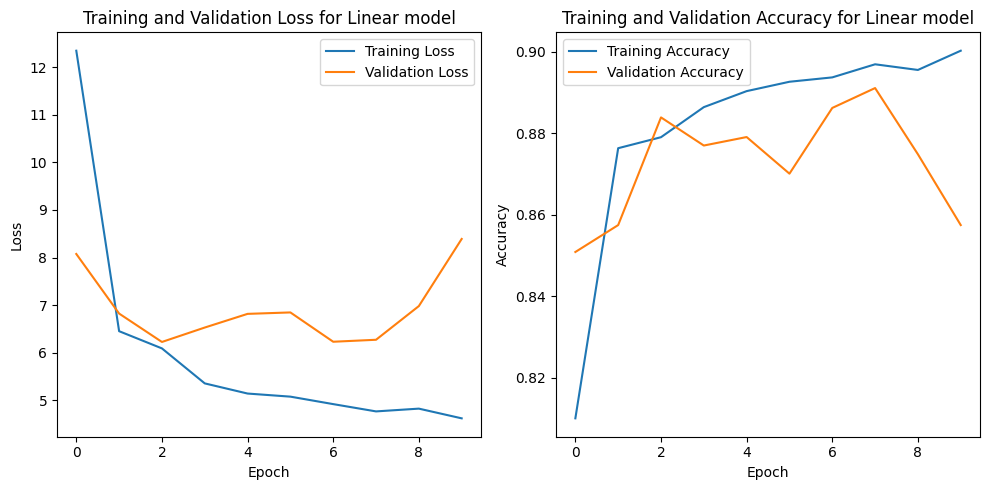

In [ ]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for Linear model')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for Linear model')
plt.legend()

plt.tight_layout()
plt.show()


<font color='cyan'>It is seen that with 1 perceptron linear model, accuracy moved from 11% (baseline), to 85%. We can also see that that the validation accuracy was not consistent, which perhaps suggest a linear model isnt the best for this classification case</font>


##<font color='cyan'>Non-Linear Model</font>

In [ ]:
non_linear_model = keras.Sequential([
  layers.InputLayer(input_shape=(28, 28, 1)),
  layers.Flatten(),
  layers.Dense(128, activation='relu'), # I have adjusted the linear model to 128 all linked neurons
  layers.Dense(10, activation='softmax')  # maintainig 10 output neurons for 0 - 9 classifi ation
])


##<font color='cyan'>Fitting and saving the non-linear Model</font>


In [ ]:
# configuring for training
non_linear_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the non-linear model
history_non_linear = non_linear_model.fit(X_train_reshaped, y_train, epochs=10, validation_data=(X_val_reshaped, y_val))

# Saving the non-linear model
non_linear_model.save('non_linear_model.h5')


Epoch 1/10
788/788 [==============================] - 5s 5ms/step - loss: 6.0022 - accuracy: 0.8468 - val_loss: 1.4370 - val_accuracy: 0.8701
Epoch 2/10
788/788 [==============================] - 3s 4ms/step - loss: 0.8082 - accuracy: 0.8907 - val_loss: 0.6960 - val_accuracy: 0.8764
Epoch 3/10
788/788 [==============================] - 6s 7ms/step - loss: 0.4284 - accuracy: 0.9121 - val_loss: 0.5840 - val_accuracy: 0.9000
Epoch 4/10
788/788 [==============================] - 4s 4ms/step - loss: 0.3278 - accuracy: 0.9255 - val_loss: 0.5618 - val_accuracy: 0.9061
Epoch 5/10
788/788 [==============================] - 3s 4ms/step - loss: 0.2797 - accuracy: 0.9320 - val_loss: 0.5314 - val_accuracy: 0.9163
Epoch 6/10
788/788 [==============================] - 3s 4ms/step - loss: 0.2783 - accuracy: 0.9367 - val_loss: 0.5226 - val_accuracy: 0.9204
Epoch 7/10
788/788 [==============================] - 5s 7ms/step - loss: 0.2672 - accuracy: 0.9396 - val_loss: 0.5457 - val_accuracy: 0.9076
Epoch 

In [ ]:
# Loading the non-linear model (to validate the saved model)
loaded_non_linear_model = load_model('non_linear_model.h5')

# Evaluation on validation data
val_loss, val_accuracy = loaded_non_linear_model.evaluate(X_val_reshaped, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


525/525 [==============================] - 1s 2ms/step - loss: 0.3879 - accuracy: 0.9335
Validation Accuracy: 93.35%


<font color='cyan'>visuals of the result</font>


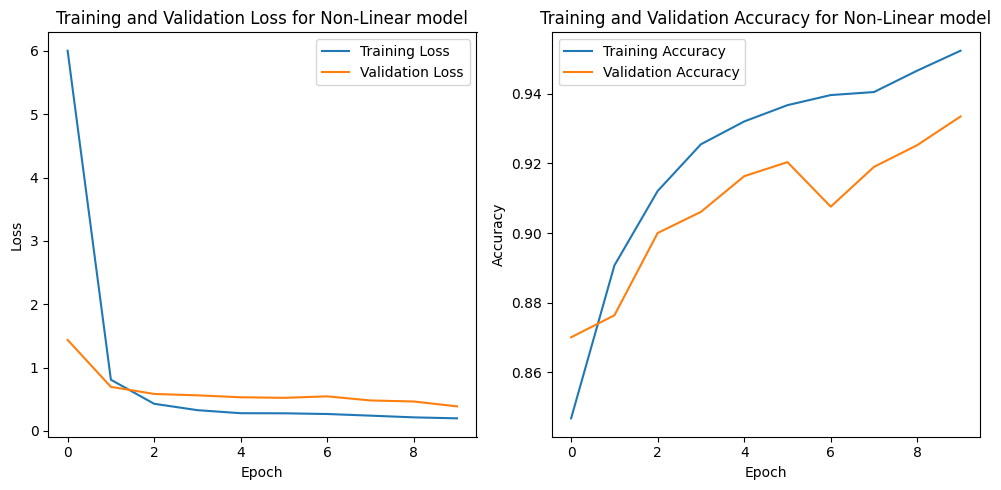

In [ ]:
# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_non_linear.history['loss'], label='Training Loss')
plt.plot(history_non_linear.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for Non-Linear model')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_non_linear.history['accuracy'], label='Training Accuracy')
plt.plot(history_non_linear.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for Non-Linear model')
plt.legend()

plt.tight_layout()
plt.show()


<font color='cyan'>We can see the result of the non-linear model shows a significant improvement to the performance at 93% accuracy in contrast to the linear which was at 85%. We can also see some degree of consistency in the epochs accuracy. Fair to say the model improved more per epoch </font>


In [ ]:
# visualization

##<font color='cyan'>CNN Model</font>


In [ ]:
# Defining the CNN model
cnn_model = keras.Sequential([
    layers.InputLayer(input_shape=(28, 28, 1)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'), #using 128 neurons
    layers.Dense(10, activation='softmax')
])


In [ ]:
# Configuring the model for training
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the CNN model
history_cnn = cnn_model.fit(X_train_reshaped, y_train, epochs=10, validation_data=(X_val_reshaped, y_val))

# Saving the CNN model
cnn_model.save('cnn_model.h5')


Epoch 1/10
788/788 [==============================] - 25s 31ms/step - loss: 0.4810 - accuracy: 0.9077 - val_loss: 0.1186 - val_accuracy: 0.9628
Epoch 2/10
788/788 [==============================] - 26s 33ms/step - loss: 0.0808 - accuracy: 0.9753 - val_loss: 0.0805 - val_accuracy: 0.9761
Epoch 3/10
788/788 [==============================] - 24s 30ms/step - loss: 0.0564 - accuracy: 0.9826 - val_loss: 0.0794 - val_accuracy: 0.9761
Epoch 4/10
788/788 [==============================] - 27s 34ms/step - loss: 0.0490 - accuracy: 0.9836 - val_loss: 0.1364 - val_accuracy: 0.9644
Epoch 5/10
788/788 [==============================] - 22s 28ms/step - loss: 0.0380 - accuracy: 0.9875 - val_loss: 0.0818 - val_accuracy: 0.9770
Epoch 6/10
788/788 [==============================] - 24s 31ms/step - loss: 0.0417 - accuracy: 0.9864 - val_loss: 0.0775 - val_accuracy: 0.9784
Epoch 7/10
788/788 [==============================] - 22s 28ms/step - loss: 0.0318 - accuracy: 0.9898 - val_loss: 0.0939 - val_accuracy:

In [ ]:
# Load the CNN model (to validate the saved model)
loaded_cnn_model = load_model('cnn_model.h5')

# Evaluate on validation data
val_loss, val_accuracy = loaded_cnn_model.evaluate(X_val_reshaped, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

525/525 [==============================] - 4s 8ms/step - loss: 0.0689 - accuracy: 0.9832
Validation Accuracy: 98.32%


<font color='cyan'>visuals of the result</font>


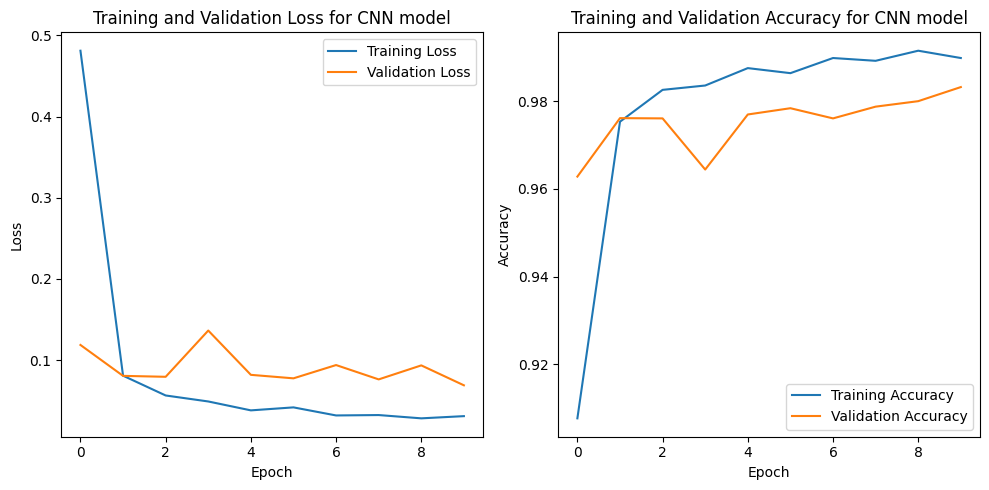

In [ ]:
# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for CNN model')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for CNN model')
plt.legend()

plt.tight_layout()
plt.show()


<font color='cyan'>We see here that the acuracy of the CNN model is best at 98% at the 10th epoch. this shows our model got better per iteration and wasnt overfitted. This is also an improvement from the accuracy of the non-linear model which was seen as 93%</font>


##<font color='cyan'>Since CNN gave the best result, now we will use it on test dataset</font>


In [ ]:
# Reshaping the test data
X_test_cnn = dig_test.values.reshape(-1, 28, 28, 1)

# Making predictions using the CNN model
predictions = cnn_model.predict(X_test_cnn)

# Getting the predicted labels (class with highest probability) for each image
predicted_labels = np.argmax(predictions, axis=1)

# Making a DataFrame with image IDs and predicted labels
image_ids = dig_test.index  #Making index into image id
result_df = pd.DataFrame({'ID': image_ids, 'Label': predicted_labels})

result_df


875/875 [==============================] - 7s 8ms/step


,ID,Label
0,0,2
1,1,0
2,2,9
3,3,9
4,4,3
...,...,...
27995,27995,9
27996,27996,7
27997,27997,3
27998,27998,9
